In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [3]:
df = pd.read_csv("glassdoor_jobs.csv")
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 956 entries, 0 to 955
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         956 non-null    int64  
 1   Job Title          956 non-null    object 
 2   Salary Estimate    956 non-null    object 
 3   Job Description    956 non-null    object 
 4   Rating             956 non-null    float64
 5   Company Name       956 non-null    object 
 6   Location           956 non-null    object 
 7   Headquarters       956 non-null    object 
 8   Size               956 non-null    object 
 9   Founded            956 non-null    int64  
 10  Type of ownership  956 non-null    object 
 11  Industry           956 non-null    object 
 12  Sector             956 non-null    object 
 13  Revenue            956 non-null    object 
 14  Competitors        956 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 112.2+ KB


In [6]:
df.describe()

,Unnamed: 0,Rating,Founded
count,956.000000,956.000000,956.000000
mean,477.500000,3.601255,1774.605649
std,276.117729,1.067619,598.942517
min,0.000000,-1.000000,-1.000000
25%,238.750000,3.300000,1937.000000
50%,477.500000,3.800000,1992.000000
75%,716.250000,4.200000,2008.000000
max,955.000000,5.000000,2019.000000


In [7]:
df.shape

(956, 15)

In [8]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['Unnamed: 0', 'Rating', 'Founded']

We have 12 categorical features : ['Job Title', 'Salary Estimate', 'Job Description', 'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors']


In [9]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

Job Title
Data Scientist                       18.619247
Data Engineer                         7.112971
Senior Data Scientist                 4.393305
Data Analyst                          1.882845
Senior Data Engineer                  1.778243
                                       ...    
Data Science Intern                   0.104603
Environmental Scientist               0.104603
Environmental Data Specialist         0.104603
Data & Analytics Consultant (NYC)     0.104603
Machine Learning Engineer (NLP)       0.104603
Name: proportion, Length: 328, dtype: float64
---------------------------
Salary Estimate
-1                                  22.384937
$86K-$143K (Glassdoor est.)          0.627615
$54K-$115K (Glassdoor est.)          0.627615
$49K-$113K (Glassdoor est.)          0.627615
$21-$34 Per Hour(Glassdoor est.)     0.627615
                                      ...    
$74K-$119K (Glassdoor est.)          0.104603
$55K-$97K (Glassdoor est.)           0.104603
$15K-$16K(Emplo

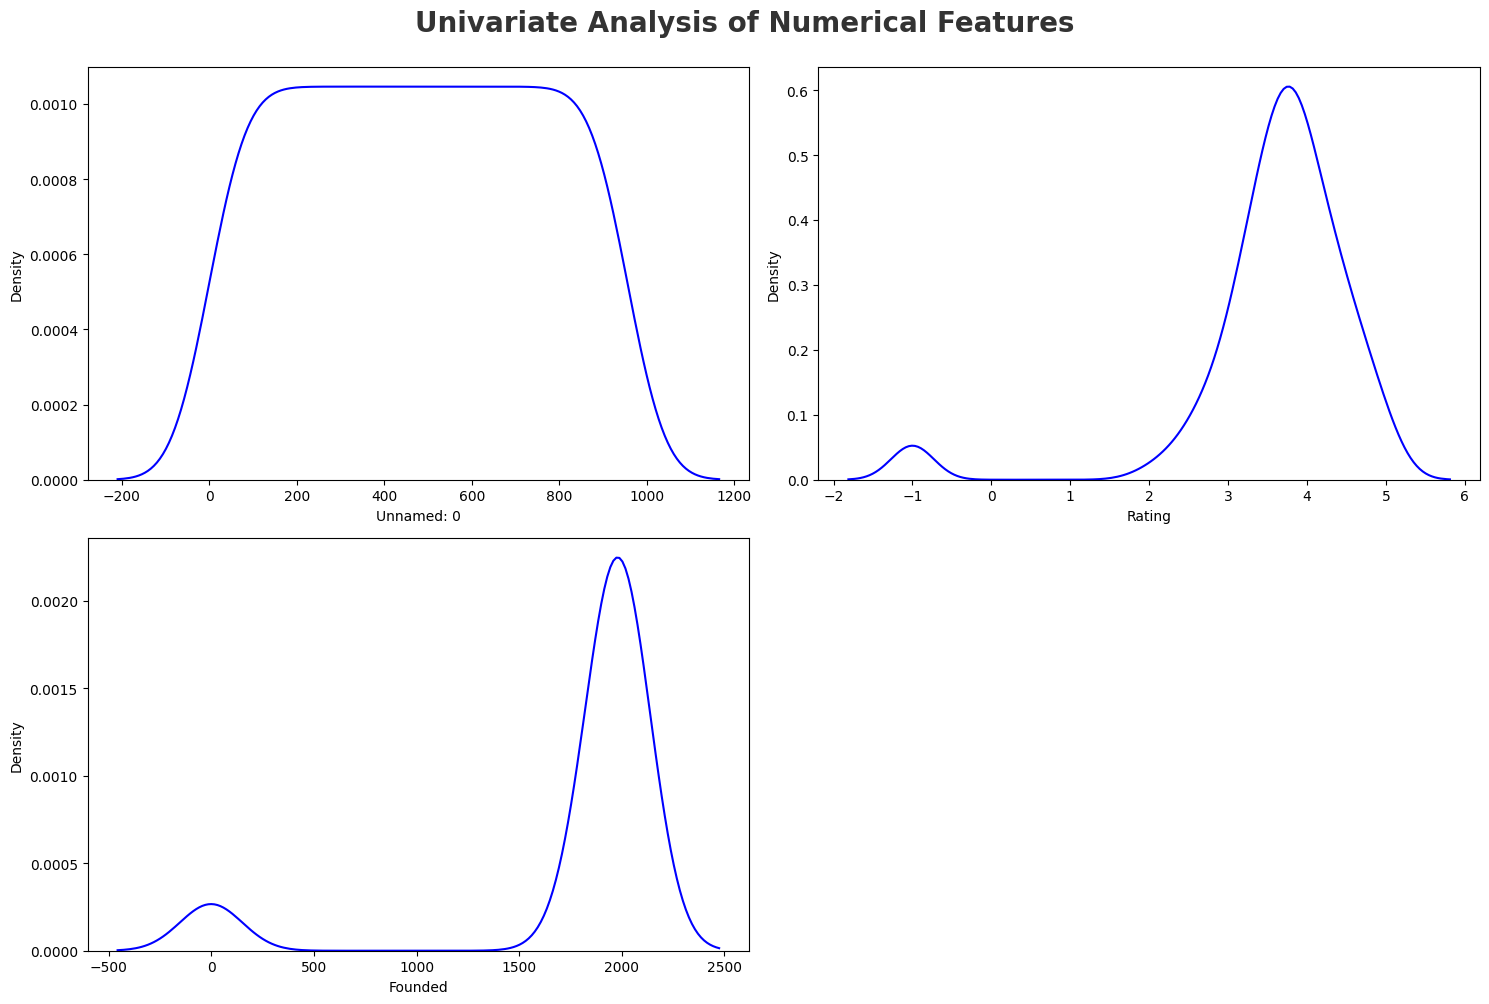

In [10]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [14]:
import re
def extract_salary(salary_str):
    # Extract numbers like $75K-$95K
    numbers = re.findall(r'(\d+)', salary_str)
    if len(numbers) >= 2:
        return (int(numbers[0]) + int(numbers[1])) / 2
    elif len(numbers) == 1:
        return int(numbers[0])
    else:
        return np.nan

df['Salary_Estimate_Num'] = df['Salary Estimate'].apply(extract_salary)

In [15]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Salary_Estimate_Num
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,72.0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,87.5
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,85.0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",76.5
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",114.5


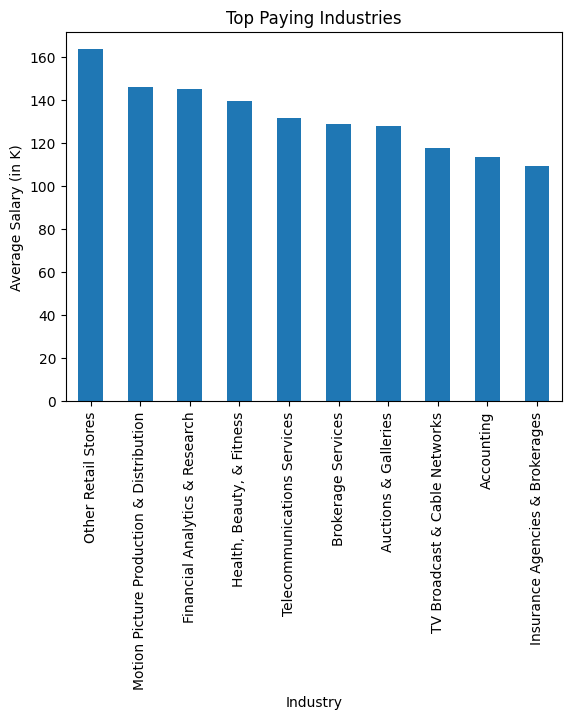

In [16]:
top_industries = df.groupby('Industry')['Salary_Estimate_Num'].mean().sort_values(ascending=False).head(10)
top_industries.plot(kind='bar', title='Top Paying Industries')
plt.ylabel('Average Salary (in K)')
plt.show()

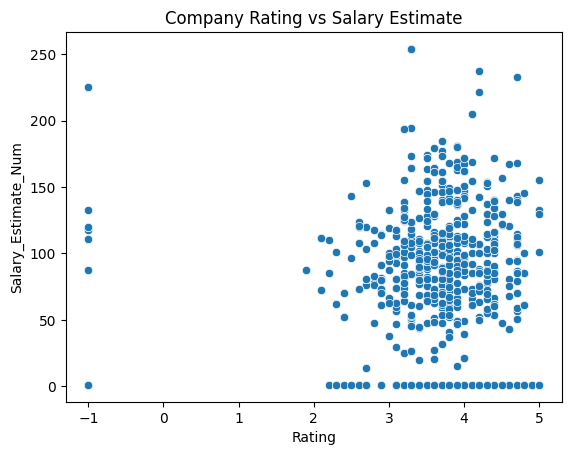

In [17]:
sns.scatterplot(x='Rating', y='Salary_Estimate_Num', data=df)
plt.title('Company Rating vs Salary Estimate')
plt.show()

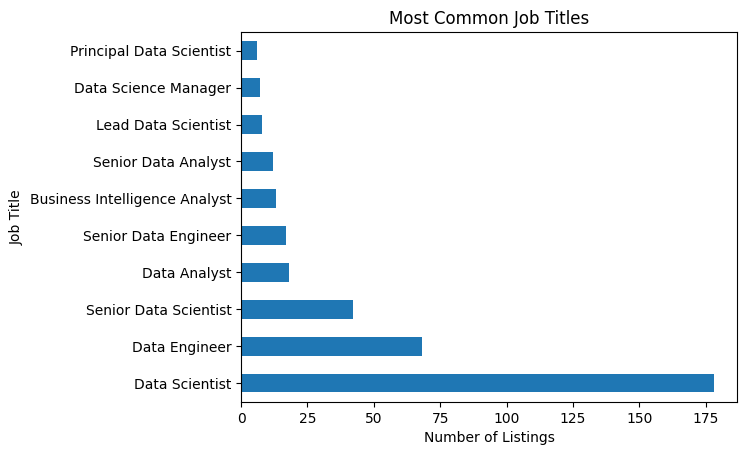

In [18]:
job_title_counts = df['Job Title'].value_counts().head(10)
job_title_counts.plot(kind='barh', title='Most Common Job Titles')
plt.xlabel('Number of Listings')
plt.ylabel('Job Title')
plt.show()

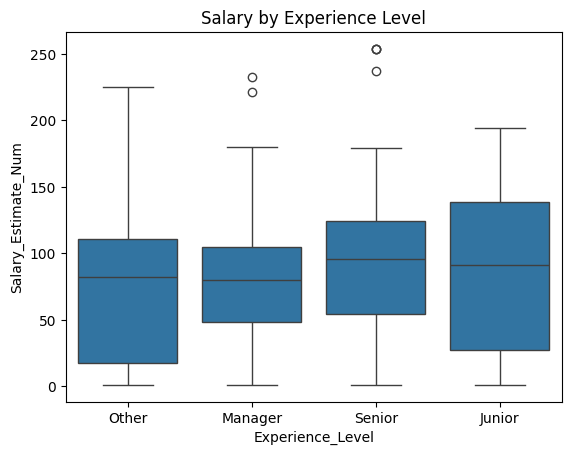

In [19]:
def detect_experience(desc):
    desc = desc.lower()
    if 'senior' in desc or 'sr ' in desc:
        return 'Senior'
    elif 'junior' in desc or 'entry level' in desc or 'jr ' in desc:
        return 'Junior'
    elif 'manager' in desc:
        return 'Manager'
    else:
        return 'Other'

df['Experience_Level'] = df['Job Description'].apply(detect_experience)
sns.boxplot(x='Experience_Level', y='Salary_Estimate_Num', data=df)
plt.title('Salary by Experience Level')
plt.show()

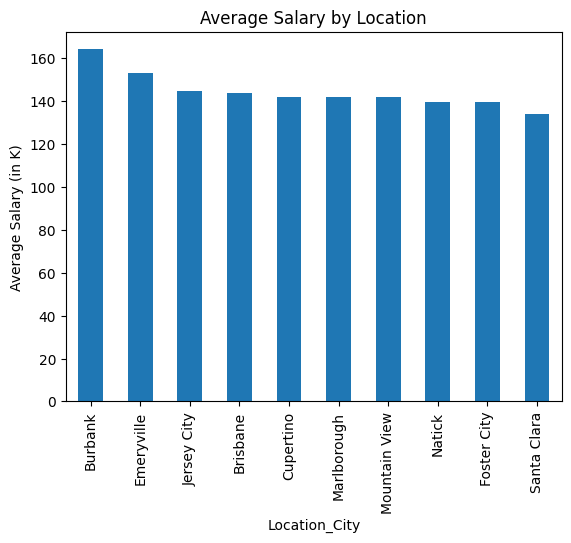

In [20]:
df['Location_City'] = df['Location'].apply(lambda x: x.split(',')[0])
location_salary = df.groupby('Location_City')['Salary_Estimate_Num'].mean().sort_values(ascending=False).head(10)
location_salary.plot(kind='bar', title='Average Salary by Location')
plt.ylabel('Average Salary (in K)')
plt.show()

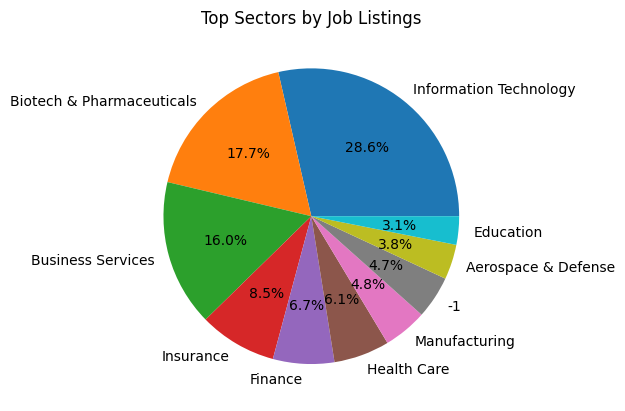

In [21]:
sector_counts = df['Sector'].value_counts().head(10)
sector_counts.plot(kind='pie', autopct='%1.1f%%', title='Top Sectors by Job Listings')
plt.ylabel('')
plt.show()

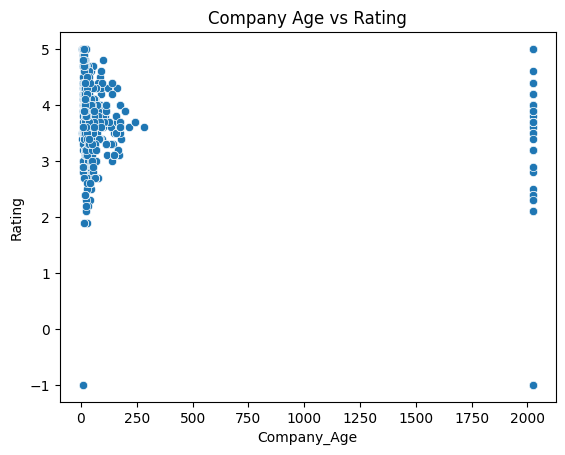

In [22]:
current_year = 2025  # Update this accordingly
df['Company_Age'] = current_year - df['Founded']
sns.scatterplot(x='Company_Age', y='Rating', data=df)
plt.title('Company Age vs Rating')
plt.show()

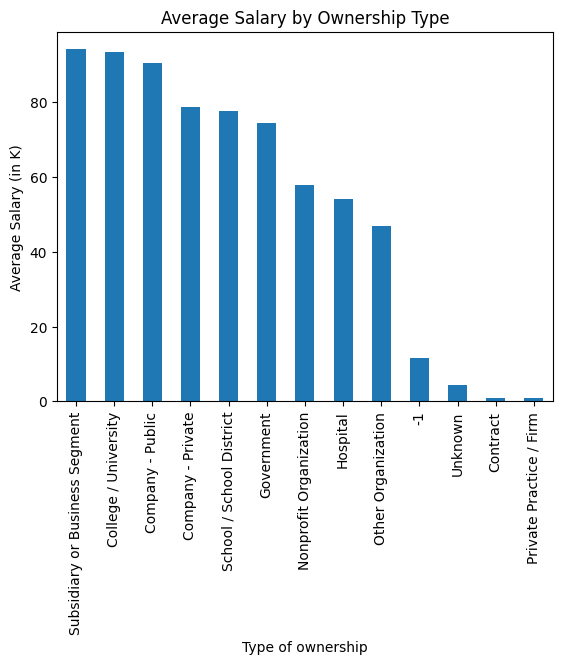

In [23]:
ownership_salary = df.groupby('Type of ownership')['Salary_Estimate_Num'].mean().sort_values(ascending=False)
ownership_salary.plot(kind='bar', title='Average Salary by Ownership Type')
plt.ylabel('Average Salary (in K)')
plt.show()

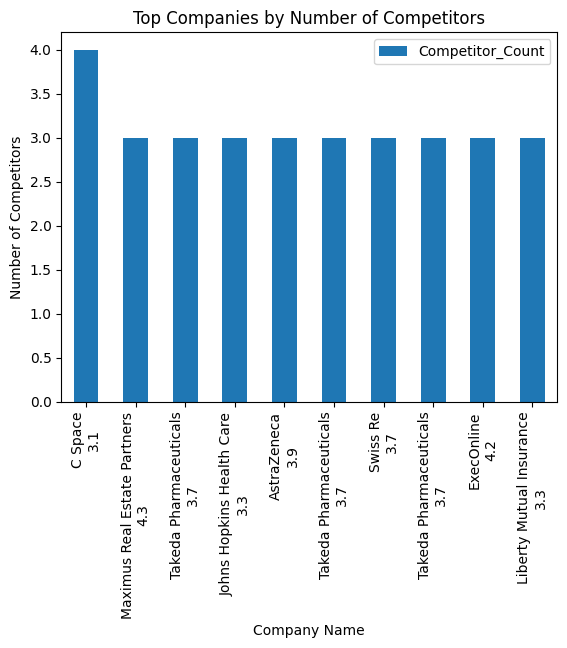

In [24]:
df['Competitor_Count'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
top_competitive = df[['Company Name', 'Competitor_Count']].sort_values(by='Competitor_Count', ascending=False).head(10)
top_competitive.set_index('Company Name').plot(kind='bar', title='Top Companies by Number of Competitors')
plt.ylabel('Number of Competitors')
plt.show()